In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def marchpast(l, g,sigma):
    "Marchenko-Pastur distribution"
    # input - g determines the shape of the distribution (MP) - sqrt(p/n)
    #         sigma - the scale of the normal distribution
    #         l - points in axis to compute the MP distribution
    # return: the MP distribution for points in l

    def m0(a):
        "Element wise maximum of (a,0)"
        return np.maximum(a, np.zeros_like(a))
    gplus=(sigma*(1+g**0.5))**2
    gminus=(sigma*(1-g**0.5))**2
    return np.sqrt(  m0(gplus  - l) *  m0(l- gminus)) / ( 2*np.pi*g*l*(sigma**2))

def cv(a):
    
    "Covariance matrix"
    return np.matmul(a, a.transpose())/a.shape[1]

def randcv(n, p, sigma):
    """
    # Input: 
    # n,p dimension of random matrix
    # sigma - scale of normal distribution
    # s - number of random matrices to generate

    Returns  s covariance matric
    """
    r=[]
    
    x=sigma*np.random.normal(size=(n,p))#+np.outer(np.random.normal(scale = signal,size = (1,n)),v)        

    x = x-np.mean(x)
    r.append(cv(x))
    return np.array(r)

def EE(a, gamma,sigma):
    "Calculate and show histogram of eigenvalues"
    
    ee, ev=np.linalg.eigh(a)
    nn, bb, patches=plt.hist(ee.ravel(), 
                                bins="auto", 
                                density=True)
    x=np.arange(bb[0], bb[-1], 0.003)
    y = marchpast(x, gamma,sigma)
    return x,y,nn,ee
    

1.2168094424409364


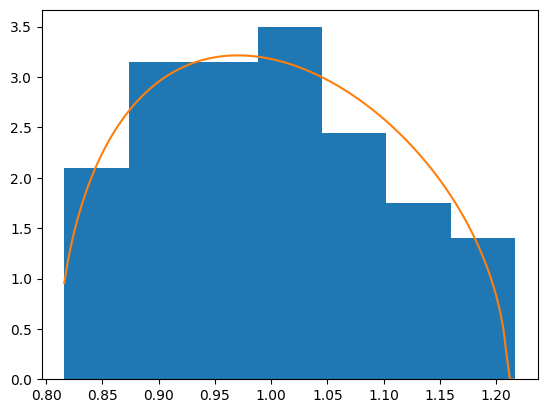

In [4]:
p = 50
n = 5000
sigma = 1
x,y,nn,ee = EE(randcv(p,n,sigma), p/n,sigma)
#EE(randcv(5,30,50000, "N"), 5.0/30.)
plt.plot(x, y)
#plt.ylim(top=nn[1:].max() * 1.1)
#plt.show()
print(np.max(ee))
#print(ee)
